# Ch9‑kvadrát test nezávislosti (Chi‑square test of independence)



## Cíl lekce

- Pochopit **kdy a proč** použít chi‑kvadrát test nezávislosti.
- Umět **formulovat hypotézy**: $H_0$ (proměnné jsou nezávislé) vs. $H_1$ (proměnné jsou závislé).
- Umět **spočítat testovou statistiku $\chi^2$**, stupně volnosti a p‑hodnotu.
- Projít si **statickou kontingenční tabulku** s mezikroky výpočtu.
- Po teorii provést **dynamický výpočet v Pythonu**.


## Teorie: Kdy použít chi‑kvadrát test

Chí‑kvadrát test nezávislosti se používá pro **dvojici kategoriálních proměnných**, abychom ověřili, zda mezi nimi existuje **závislost** (asociace), nebo zda jsou **nezávislé**.

**Hypotézy:**
$$ H_0: \text{Proměnné jsou nezávislé} \qquad H_1: \text{Proměnné nejsou nezávislé}. $$

**Předpoklady:**
1. Data jsou v podobě **kontingenční tabulky** (četnosti v kategoriích).
2. Očekávané četnosti v buňkách by měly být dostatečně velké (obvykle alespoň 5).


## Vzorce
Statistika chí‑kvadrát:
$$ \chi^2 = \sum_{i=1}^{r}\sum_{j=1}^{c} \frac{(O_{ij} - E_{ij})^2}{E_{ij}}, $$
kde:
- $O_{ij}$ = **pozorovaná četnost** v buňce (i,j)
- $E_{ij}$ = **očekávaná četnost** v buňce (i,j)
- $r$ = počet řádků, $c$ = počet sloupců

**Očekávané četnosti:**
$$ E_{ij} = \frac{(\text{součet řádku i})\cdot(\text{součet sloupce j})}{N}, $$
kde $N$ = celkový součet všech četností.

Stupně volnosti:
$$ df = (r-1)(c-1). $$

p‑hodnota:
$$ p = P(\chi^2_{df} \ge \chi^2_{\text{pozor}}). $$


## Statický příklad

**Otázka:** Je preference nápoje (Káva/Čaj) nezávislá na pohlaví (Muž/Žena)?

**Pozorované četnosti ($O_{ij}$):**

|        | Káva | Čaj | Součet |
|--------:|-----:|----:|-------:|
| Muži    | 30   | 10  | 40 |
| Ženy    | 20   | 20  | 40 |
| **Součet** | 50 | 30 | 80 |

**Výpočet očekávaných četností ($E_{ij}$):**

- Muži & Káva: $(40\cdot50)/80 = 25$
- Muži & Čaj: $(40\cdot30)/80 = 15$
- Ženy & Káva: $(40\cdot50)/80 = 25$
- Ženy & Čaj: $(40\cdot30)/80 = 15$

**Tabulka s $O_{ij}, E_{ij}$ a příspěvkem:**

|        | $O$ | $E$ | $(O-E)^2/E$ |
|--------:|---:|---:|------------:|
| Muži,Káva | 30 | 25 | 1,0 |
| Muži,Čaj | 10 | 15 | 1,67 |
| Ženy,Káva | 20 | 25 | 1,0 |
| Ženy,Čaj | 20 | 15 | 1,67 |
| **Součet $\chi^2$** |   |   | **5,33** |

Stupně volnosti: $(2-1)(2-1) = 1$.

Odhad p‑hodnoty: $p \approx 0,02$.

**Rozhodnutí ($\alpha=0,05$):** protože $p < 0,05$, **odmítáme $H_0$**. Preference nápoje závisí na pohlaví.


In [1]:
# Import knihoven
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


## Praktická ukázka: výpočet chi‑kvadrát testu v Pythonu

Použijeme stejná data jako v tabulce výše.

In [2]:
# Kontingenční tabulka (Muži vs. Ženy x Káva vs. Čaj)
obs = np.array([[30, 10],
                [20, 20]])

# Test nezávislosti
chi2, p, dof, expected = stats.chi2_contingency(obs)
chi2, dof, p, expected

(4.32,
 1,
 0.03766692222862869,
 array([[25., 15.],
        [25., 15.]]))

### Interpretace výsledku (neměnný text v markdown)

- Pokud $p \le \alpha$, **odmítáme $H_0$**.
- V našem příkladu při $\alpha = 0,05$ vychází $p \approx 0,02$, tedy **odmítáme $H_0$**.


## Volitelná vizualizace: mozaikový graf (pozorované vs. očekávané)

Pro názornost můžeme porovnat pozorované a očekávané četnosti.

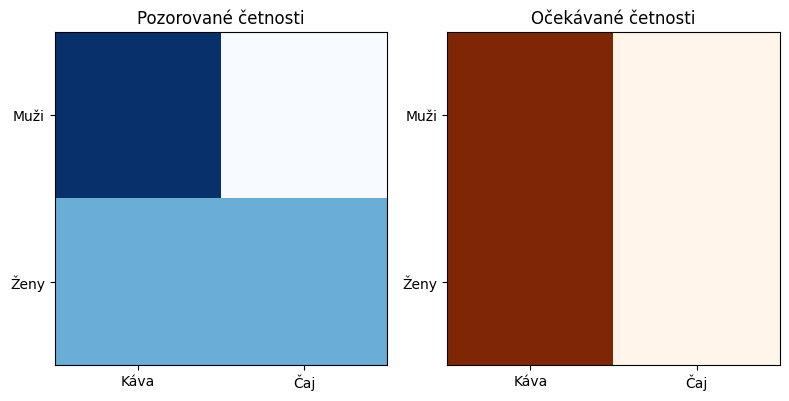

In [3]:
labels = ['Káva','Čaj']
groups = ['Muži','Ženy']

fig, axes = plt.subplots(1,2,figsize=(8,4))
axes[0].imshow(obs, cmap='Blues')
axes[0].set_xticks([0,1])
axes[0].set_xticklabels(labels)
axes[0].set_yticks([0,1])
axes[0].set_yticklabels(groups)
axes[0].set_title('Pozorované četnosti')

axes[1].imshow(expected, cmap='Oranges')
axes[1].set_xticks([0,1])
axes[1].set_xticklabels(labels)
axes[1].set_yticks([0,1])
axes[1].set_yticklabels(groups)
axes[1].set_title('Očekávané četnosti')

plt.tight_layout()
plt.show()


## Shrnutí

Chi‑kvadrát test nezávislosti:
- Vstup: kontingenční tabulka kategoriálních proměnných.
- Výstup: $\chi^2$ statistika, df, p‑hodnota.
- Rozhodnutí: pokud $p$ menší než $\alpha$, odmítáme $H_0$ a tvrdíme, že proměnné nejsou nezávislé.
